<a href="https://colab.research.google.com/github/pacayton/Stat_268_Advanced_Time_Series_Analysis/blob/main/Stat_268_Week2_Intervention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Stat 268: Advanced Time Series Analysis
$$\quad$$
## Assoc Prof Peter Julian Cayton, PhD
## School of Statistics
## University of the Philippines Diliman
## [Google Scholar](https://scholar.google.com/citations?user=KtH_mGEAAAAJ)




# Interrupted Time Series Analysis (ITSA)

*   Also known as "intervention analysis". (TSAAR)
*   It is a system of methods in time series analysis to extract insights on the nature and impact of interventions in the behavior of the phenomenon as observed from the time series data. (TSAAR)
* It is also a field in causal inference in which the causal effect of interventions, such as policies, are analyzed from the shifts in the behavior observed from time series data. (ITSAOUP)

## Interventions

* events in the history of the phenomenon that leads to changes in behavior that are observable in the time series data.
* These changes may be abrupt or gradual, and their impact may be permanent or temporary (ITSASP)
* Examples: policy changes, new laws, changes in government/management, reforms, change in practices, mergers and acquisitions, weather events, sudden events.



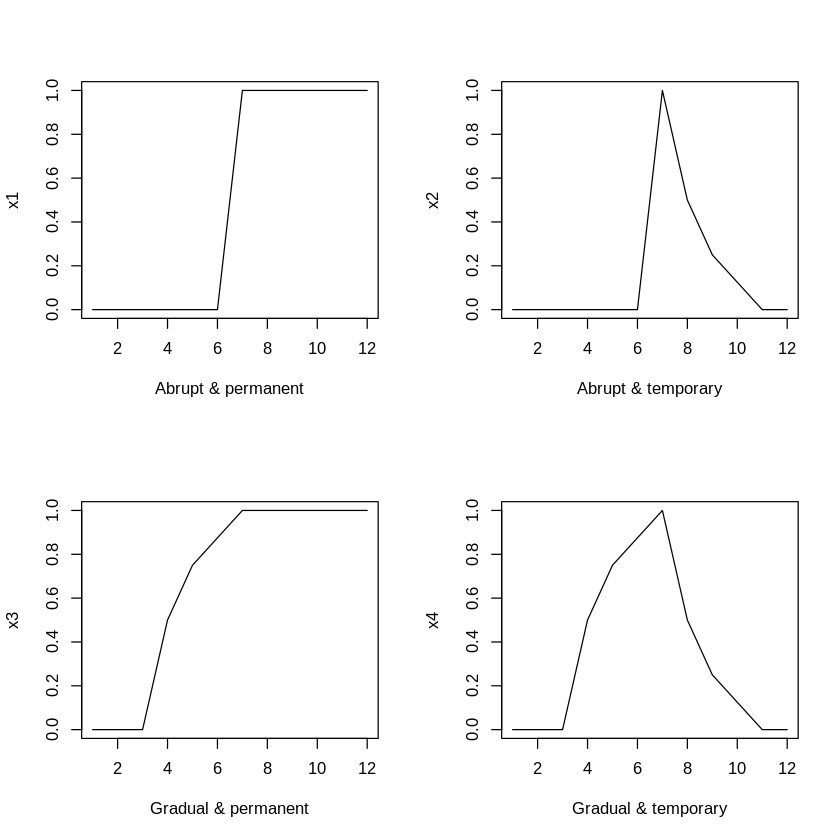

In [2]:
## Examples of Observed Impact of Interventions in Time Series Data

par(mfrow =c(2,2)) ## displays graphs in 2 rows and 2 columns

x1 <- c(0,0,0,0,0,0,1,1,1,1,1,1) ## Abrupt & permanent
x2 <- c(0,0,0,0,0,0,1, 0.5, 0.25, 0.125,0,0) ## Abrupt & temporary
x3 <- c(0,0,0,0.5, 0.75, 0.875, 1,1,1,1,1,1) ## Gradual & permanent
x4 <- c( 0,0,0,0.5, 0.75, 0.875, 1, 0.5, 0.25, 0.125,0,0) ## Gradual & temporary

plot(x1, xlab = "Abrupt & permanent", type = "l")
plot(x2, xlab = "Abrupt & temporary", type = "l")
plot(x3, xlab = "Gradual & permanent", type = "l")
plot(x4, xlab = "Gradual & temporary", type = "l")

Comment: The gradual-temporary combination is rarely used in practice, though one can create a model that simulates the occurrence, as shown here, and can fit it with data once we have discussed the basics of ITSA. I will leave that to the exploration of the reader.

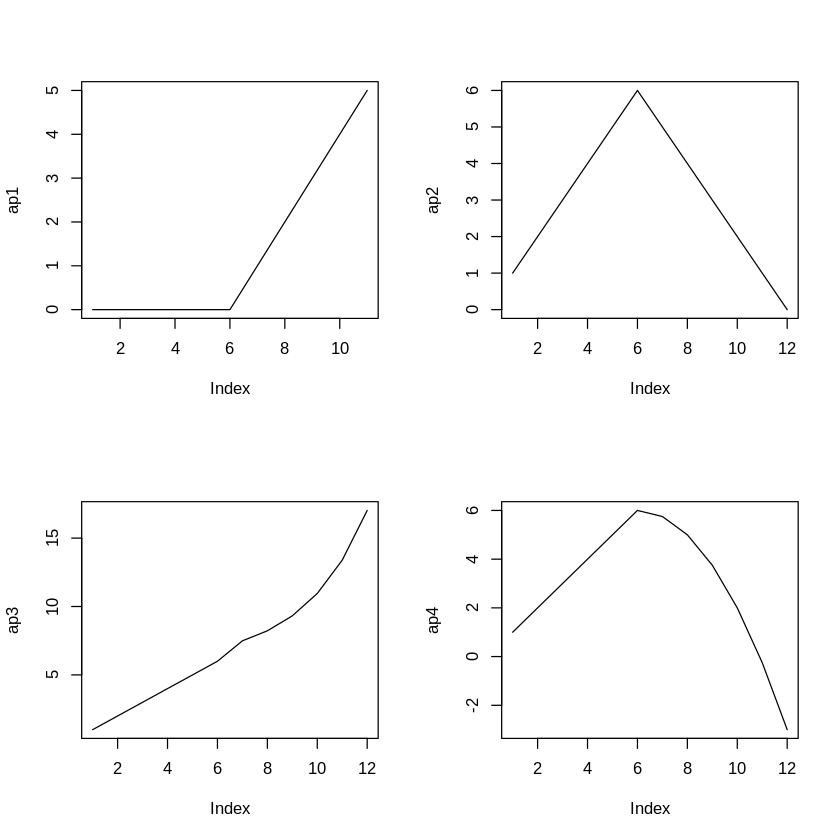

In [4]:
## Other (Non-exhaustive) Examples of Abrupt & Permanent Changes

par(mfrow =c(2,2))

ap1 <- c(0,0,0,0,0,0,1,2,3,4,5)
ap2 <- c(1,2,3,4,5,6,5,4,3,2,1,0)
ap3 <- c(1,2,3,4,5, 6, 6+exp(0.4), 6+exp(0.8), 6+exp(1.2), 6+exp(1.6), 6+exp(2), 6+exp(2.4) )
ap4 <- c(1,2,3,4,5, 6, 6-(0.5)^2, 6-(1)^2, 6-(1.5)^2, 6-(2)^2, 6-(2.5)^2, 6-(3)^2 )

plot(ap1, type = "l")
plot(ap2, type = "l")
plot(ap3, type = "l")
plot(ap4, type = "l")

Comment: There are many manifestations of the abrupt-permanent intervention, especially in practice.

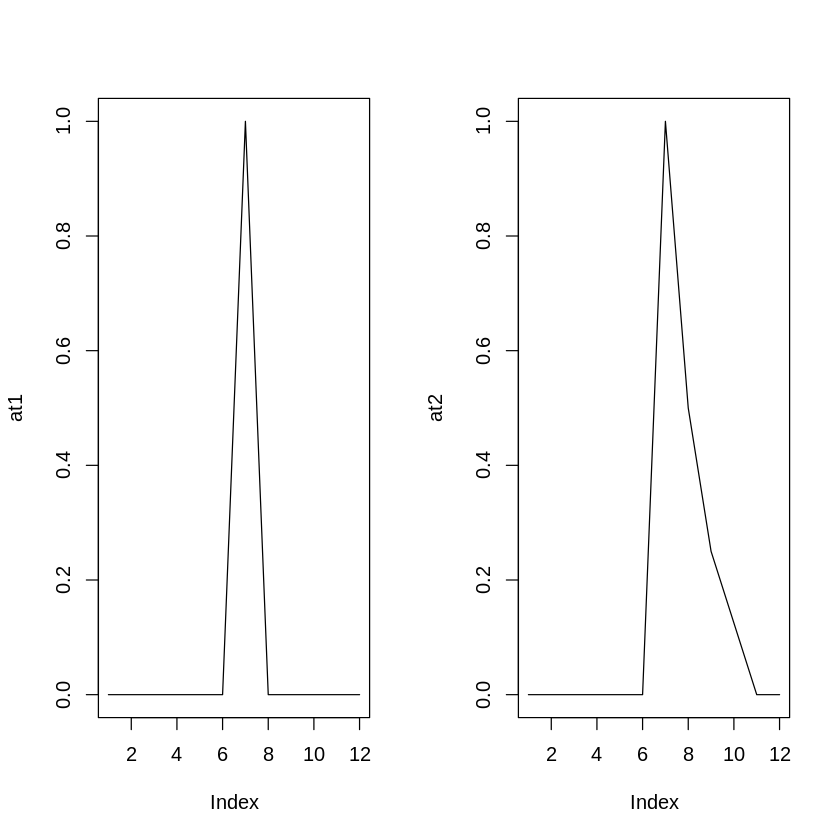

In [5]:
## Two Type of Abrupt-Temporary Changes

par(mfrow = c(1,2))

at1 <- c(0,0,0,0,0,0,1,0,0,0,0,0)
at2 <- c(0,0,0,0,0,0,1, 0.5, 0.25, 0.125,0,0)

plot(at1, type="l")
plot(at2, type="l")



Comment: The occurrence of the first type as seen above may be called an outlier effect and is only isolated for 1 point in time and has no effect in the progression of the time series data.

## The Simple Intervention Model

$$ Y_t = L (ϵ_t) + X(I_t)$$

where

$Y_t = $ time series data,

$ L (ϵ_t) =$ time series model specification independent of the intervention effect and typically contains the error terms, e.g., ARIMA

$X(I_t) = $ the intervention impact/effect term